# Exercises

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [2]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
b = a[-3:]
# reverse the list
c = [i for i in a]
c.reverse()
# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
d = [i**2 for i in a]

print(a, b, c, d)

[1, 2, 3, 4, 5, 6] [4, 5, 6] [6, 5, 4, 3, 2, 1] [1, 4, 9, 16, 25, 36]


In [9]:
# create a numpy array from this list
import numpy as np
b = np.array(a) # change this

In [10]:
# find the mean of b
np.mean(b)

3.5

In [11]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
np.square(b)

array([ 1,  4,  9, 16, 25, 36])

In [22]:
# change b from a length-6 list to a 2x3 matrix
b = b.reshape((2, 3))

In [17]:
# find the mean value of each row
np.mean(b, axis=1)

array([2., 5.])

In [18]:
# find the mean value of each column
np.mean(b, axis=0)

array([2.5, 3.5, 4.5])

In [23]:
# find the third column of b
b[:,2]

array([3, 6])

In [1]:
# load in the "starbucks_clean.csv" dataset
import pandas as pd
df = pd.read_csv('../data/starbucks_clean.csv')

In [2]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
df['calories'].mean()

201.58447488584474

In [40]:
# how many different categories of beverages are there?
df['beverage_category'].value_counts().size

9

In [42]:
# what is the average # calories for each beverage category?
df.groupby('beverage_category').mean()['calories']

beverage_category
classicespressodrinks            140.172414
coffee                             4.250000
frappuccinoblendedcoffee         276.944444
frappuccinoblendedcrme           233.076923
frappuccinolightblendedcoffee    162.500000
shakenicedbeverages              112.500000
signatureespressodrinks          250.000000
smoothies                        282.500000
tazoteadrinks                    206.666667
Name: calories, dtype: float64

In [75]:
# what beverage preparation includes the most sugar on average?
df.groupby('beverage_prep').mean()['sugars'].sort_values(ascending=False).index[0]

'Whole Milk'

In [74]:
# what is the average % daily value calcium content for each beverage?
df.groupby('beverage').mean()['calcium']

beverage
bananachocolatesmoothie                   0.200000
brewedcoffee                              0.005000
caffamericano                             0.015000
cafflatte                                 0.350000
caffmochawithoutwhippedcream              0.300000
cappuccino                                0.225000
caramel                                   0.110000
caramelapplespicewithoutwhippedcream      0.000000
caramelmacchiato                          0.283333
caramelwithoutwhippedcream                0.120000
coffee                                    0.123333
espresso                                  0.000000
hotchocolatewithoutwhippedcream           0.350000
icedbrewedcoffeewithclassicsyrup          0.000000
icedbrewedcoffeewithmilkclassicsyrup      0.082500
javachip                                  0.116667
javachipwithoutwhippedcream               0.125556
mocha                                     0.110000
mochawithoutwhippedcream                  0.120000
orangemangobananasmoot

In [21]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
df_ = df.groupby('beverage').mean()[['protein', 'calories']].sort_values(['protein', 'calories'], ascending=[False, True])
df_.index[0]

calories     3.0
protein     20.0
dtype: float64

<AxesSubplot:ylabel='Frequency'>

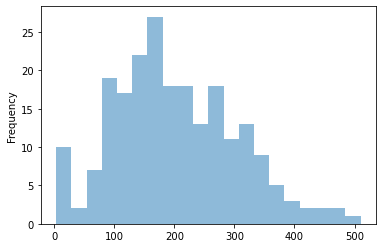

In [8]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib as mat
df["calories"].plot.hist(bins=20, alpha=0.5)

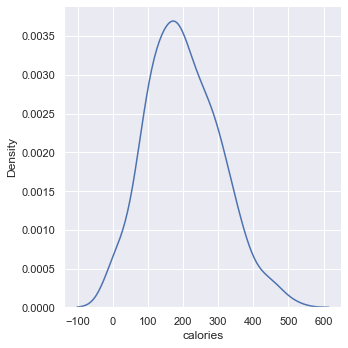

In [12]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
sns.set()
sns.displot(data=df, x="calories", kind="kde")

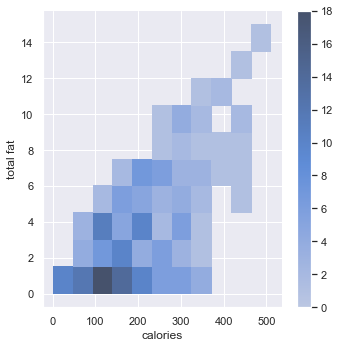

In [19]:
# plot calories against total fat using seaborn
sns.displot(df, x="calories", y="total fat", cbar=True)

In [50]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
l = ['Short', 'Tall', 'Grande', 'Venti', 'Short Nonfat Milk', 'Tall Nonfat Milk', 'Grande Nonfat Milk', 'Venti Nonfat Milk']
df2 = df[['beverage_prep', 'calories']]
df2 = df2[df2['beverage_prep'].isin(l)]

li = []
for index, row in df2.iterrows():
    if row['beverage_prep'] in ['Short', 'Tall', 'Grande', 'Venti']:
        li.append('Milk')
    else:
        li.append('None milk')
df2["category"] = li
df2['beverage_prep'] = df['beverage_prep'].str.replace(" Nonfat Milk", "", regex=True)
df2

,beverage_prep,calories,category
0,Short,3,Milk
1,Tall,4,Milk
2,Grande,5,Milk
3,Venti,5,Milk
4,Short,70,None milk
...,...,...,...
206,Tall,170,None milk
209,Grande,230,None milk
212,Venti,310,None milk
215,Tall,170,None milk


<Figure size 720x720 with 0 Axes>

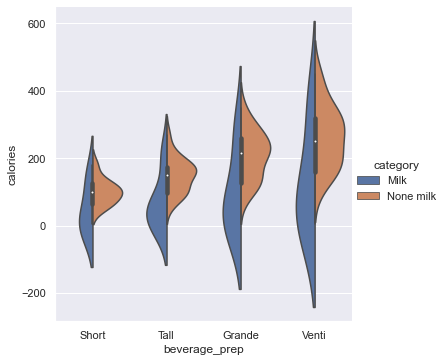

In [68]:
mat.pyplot.figure(figsize=(10, 10))
sns.catplot(data=df2, x="beverage_prep", y="calories", hue="category", kind="violin", split=True)